In [1]:
import os
import sys
from pathlib import Path
# Setting the working directory to the root of the project
project_dir = Path("C:/Users/adbou/source/repos/KFHXRelatedAi/")
os.chdir(project_dir)

from Configs.GeneralPaths import SOURCEDATA
import pandas as pd
import numpy as np

In [2]:
#load user transactions data
user_transactions = pd.read_excel(Path(SOURCEDATA / "Transaction_User.xlsx"))
new_user_tranaction = user_transactions.drop(columns=['TrxId'])
new_user_tranaction.head()
new_user_tranaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37951 entries, 0 to 37950
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   FK_BusinessUserId  37951 non-null  int64
 1   PointsRedeemed     37951 non-null  int64
 2   FK_ContentId       37951 non-null  int64
dtypes: int64(3)
memory usage: 889.6 KB


In [3]:
#load deals data
deals_data = pd.read_excel(Path(SOURCEDATA / "Cleaned_Deals.xlsx"))
deals_data = deals_data.drop(columns=['Unnamed: 0'])
deals_data.head()
deals_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ContentId    200 non-null    int64 
 1   Title        200 non-null    object
 2   FK_StatusId  200 non-null    int64 
 3   Deal Type    200 non-null    object
 4   Description  200 non-null    object
 5   Location     178 non-null    object
 6   Points       200 non-null    int64 
 7   Categories   200 non-null    object
dtypes: int64(3), object(5)
memory usage: 12.6+ KB


In [4]:
#merging deals data with user transaction data :
new_user_tranaction = new_user_tranaction.merge(deals_data[['ContentId', 'Categories']], left_on='FK_ContentId', right_on='ContentId', how='left')
new_user_tranaction = new_user_tranaction.drop(columns=['ContentId'])
new_user_tranaction

,FK_BusinessUserId,PointsRedeemed,FK_ContentId,Categories
0,976480,1000,113923,Health & Beauty
1,976480,10000,113853,Retail
2,976480,10000,113853,Retail
3,976921,10,113851,F&B
4,976480,50,113835,Travel
...,...,...,...,...
37946,1048474,5000,115099,Travel
37947,1056928,6000,115217,Entertainment
37948,1075249,3500,115231,Entertainment
37949,1110587,6000,115217,Entertainment


count    25054.000000
mean         1.514768
std          1.201259
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         24.000000
Name: count, dtype: float64


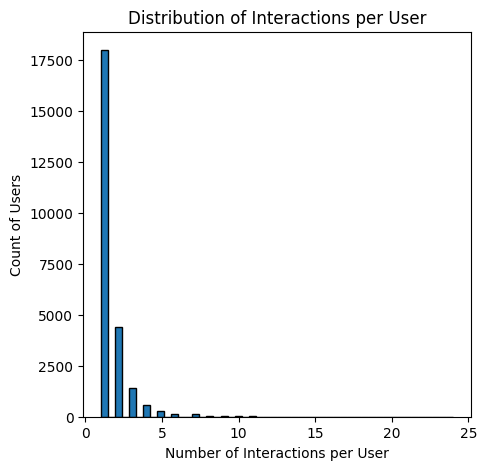

In [5]:
# Count the number of interactions per user
user_interaction_counts = new_user_tranaction['FK_BusinessUserId'].value_counts()

# Summary statistics
print(user_interaction_counts.describe())

# Plot the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.hist(user_interaction_counts, bins=50, edgecolor='k')
plt.xlabel('Number of Interactions per User')
plt.ylabel('Count of Users')
plt.title('Distribution of Interactions per User')
plt.show()

In [6]:
user_redemption_counts = new_user_tranaction['FK_BusinessUserId'].value_counts()
user_redemption_counts
#1012893

FK_BusinessUserId
1012893    24
1041226    21
994853     21
987462     21
1041129    19
           ..
1025636     1
1025665     1
1024588     1
1026390     1
1058347     1
Name: count, Length: 25054, dtype: int64

In [7]:
users_with_3_plus_redemptions = user_redemption_counts[user_redemption_counts >= 3].index
filtered_user_transactions = new_user_tranaction[new_user_tranaction['FK_BusinessUserId'].isin(users_with_3_plus_redemptions)]
filtered_user_transactions

,FK_BusinessUserId,PointsRedeemed,FK_ContentId,Categories
0,976480,1000,113923,Health & Beauty
1,976480,10000,113853,Retail
2,976480,10000,113853,Retail
3,976921,10,113851,F&B
4,976480,50,113835,Travel
...,...,...,...,...
37936,995638,3000,113819,F&B
37938,1006101,10,113851,F&B
37940,1036529,5000,115099,Travel
37942,1010056,10,113851,F&B


In [8]:
user_item_matrix = pd.pivot_table(
    new_user_tranaction,
    index='FK_BusinessUserId',
    columns='FK_ContentId',
    values='PointsRedeemed',
    fill_value=0,
    aggfunc='mean'  
).fillna(0)

In [9]:
user_item_matrix

FK_ContentId,113816,113817,113819,113823,113824,113829,113830,113833,113834,113835,...,115217,115218,115221,115223,115225,115227,115229,115231,115244,115259
FK_BusinessUserId,,,,,,,,,,,,,,,,,,,,,
976480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
976481,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
976482,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
976484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
976485,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1119351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1120134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Descriptive statistics
print(new_user_tranaction.describe())

# Checking for missing values
print(new_user_tranaction.isnull().sum())

# Checking the unique values
print(new_user_tranaction.nunique())


       FK_BusinessUserId  PointsRedeemed   FK_ContentId
count       3.795100e+04    37951.000000   37951.000000
mean        1.027162e+06     3622.291639  114567.808490
std         3.151583e+04     1898.339951     626.025033
min         9.764800e+05        1.000000  113816.000000
25%         1.003558e+06     3000.000000  113851.000000
50%         1.020134e+06     5000.000000  115099.000000
75%         1.041034e+06     5000.000000  115099.000000
max         1.120413e+06    10000.000000  115259.000000
FK_BusinessUserId    0
PointsRedeemed       0
FK_ContentId         0
Categories           0
dtype: int64
FK_BusinessUserId    25054
PointsRedeemed          15
FK_ContentId            69
Categories               8
dtype: int64


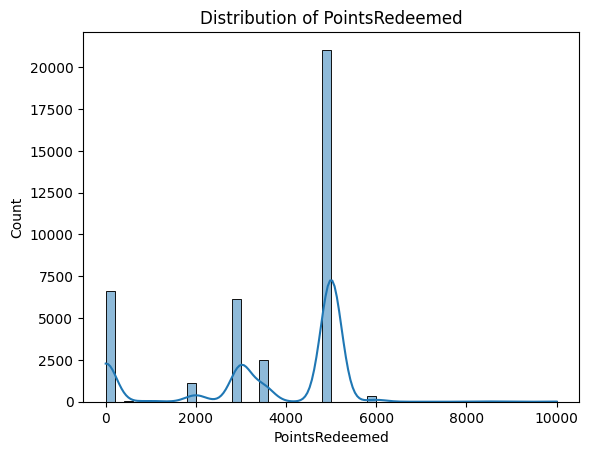

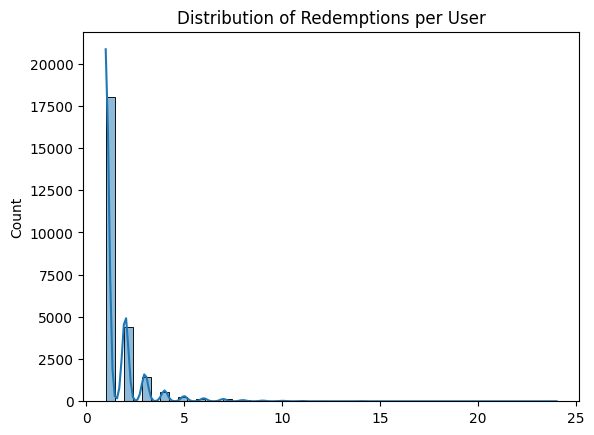

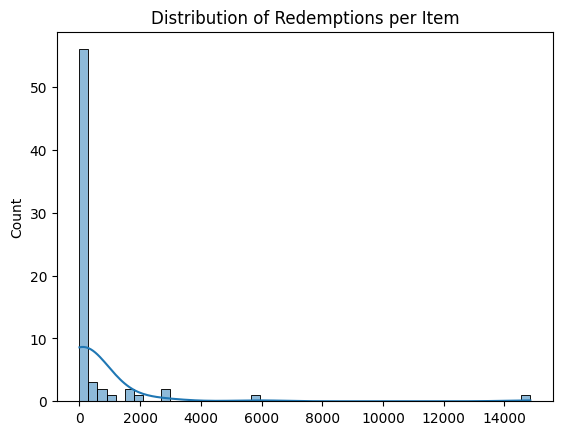

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of PointsRedeemed
sns.histplot(new_user_tranaction['PointsRedeemed'], bins=50, kde=True)
plt.title('Distribution of PointsRedeemed')
plt.show()

# Visualizing the distribution of redemptions per user
user_redemptions = new_user_tranaction.groupby('FK_BusinessUserId').size()
sns.histplot(user_redemptions, bins=50, kde=True)
plt.title('Distribution of Redemptions per User')
plt.show()

# Visualizing the distribution of redemptions per item
item_redemptions = new_user_tranaction.groupby('FK_ContentId').size()
sns.histplot(item_redemptions, bins=50, kde=True)
plt.title('Distribution of Redemptions per Item')
plt.show()


In [12]:
# Create the user-item matrix
user_item_matrix = new_user_tranaction.pivot_table(index='FK_BusinessUserId', columns='FK_ContentId', values='PointsRedeemed', fill_value=0)

# Calculate sparsity
sparsity = 1.0 - (np.count_nonzero(user_item_matrix) / float(user_item_matrix.size))
print(f"Sparsity of the user-item matrix: {sparsity:.4f}")


Sparsity of the user-item matrix: 0.9820


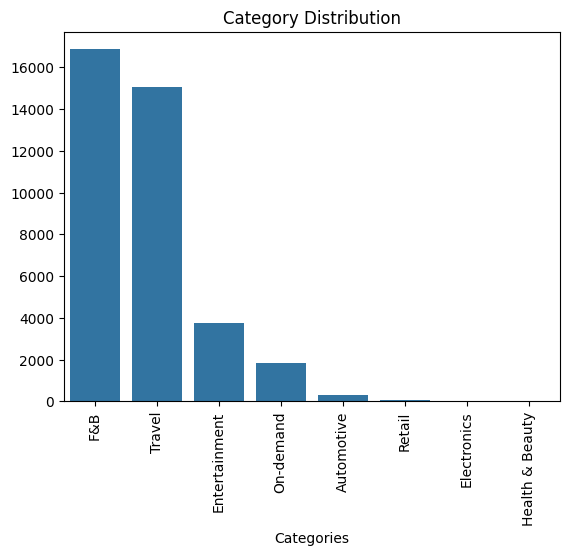

In [13]:
# Category distribution
category_counts = new_user_tranaction['Categories'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Category Distribution')
plt.xticks(rotation=90)
plt.show()


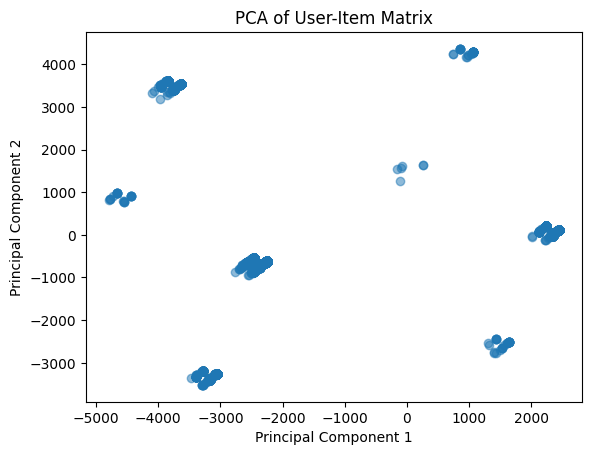

In [14]:
from sklearn.decomposition import PCA

# Fill missing values with 0
user_item_matrix_filled = user_item_matrix.fillna(0)

# Apply PCA
pca = PCA(n_components=2)
user_item_pca = pca.fit_transform(user_item_matrix_filled)

# Plot PCA
plt.scatter(user_item_pca[:, 0], user_item_pca[:, 1], alpha=0.5)
plt.title('PCA of User-Item Matrix')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [15]:
# Getting the most redeemed FK_ContentId
most_redeemed_content = new_user_tranaction['FK_ContentId'].value_counts().idxmax()
most_redeemed_count = new_user_tranaction['FK_ContentId'].value_counts().max()

print(f"The most redeemed FK_ContentId is {most_redeemed_content} with {most_redeemed_count} redemptions.")


The most redeemed FK_ContentId is 115099 with 14855 redemptions.


In [15]:
# Getting the top 10 users with the most redemptions
top_n = 30 
top_redemptions_users = new_user_tranaction['FK_BusinessUserId'].value_counts().head(top_n)

print(f"The top {top_n} users with the most redemptions are:\n{top_redemptions_users}")


The top 30 users with the most redemptions are:
FK_BusinessUserId
1012893    24
1041226    21
994853     21
987462     21
1041129    19
990816     18
994436     18
989793     18
985366     17
998741     16
1022743    16
1019058    16
1048455    15
984648     15
996385     15
1001738    15
1012199    15
1001731    15
1005732    14
996788     14
1110688    14
1001919    14
1109721    14
1008591    14
1036097    14
1023419    13
987406     13
1051741    13
994799     13
1070809    12
Name: count, dtype: int64


In [17]:

content_id_to_check = 113917
filtered_content_data = new_user_tranaction[new_user_tranaction['FK_ContentId'] == content_id_to_check]
user_redemptions = filtered_content_data.groupby('FK_BusinessUserId').size()
users_with_more_than_5_redemptions = user_redemptions[user_redemptions >= 1]

print(users_with_more_than_5_redemptions)


Series([], dtype: int64)
